In [90]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats
from scipy import optimize
from scipy.stats import norm
#plt.rcParams['text.usetex'] = True

"""
Este notebook es reproducido con base al curso del profesor 
Raul Pollar
github: https://github.com/rramosp/20182.mldl
# Machine Learning

#Machine Learning online

"""

'\nEste notebook es reproducido con base al curso del profesor \nRaul Pollar\ngithub: https://github.com/rramosp/20182.mldl\n# Machine Learning\n\n#Machine Learning online\n\n'


# 1 Dimension 

\begin{equation}
f(x)=\frac{e^{-x^2/2}}{\sqrt(2\pi)}
\end{equation}

In [91]:
#Supongamos que tenemos datos los cuales siguen una distribucion de probabilidad
# normal, emplemos la libreria stats norm de scipy:

# https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.stats.norm.html

#The location (loc) keyword specifies the mean. 
#The scale (scale) keyword specifies the standard deviation.



In [92]:
def pdf(x, mean1 = 10, mean2=12, desv1=2, desv2=2):
  fig, ax = plt.subplots(1, 1)
  
  f1 = stats.norm(loc = mean1, scale = desv1)
  f2 = stats.norm(loc = mean2, scale = desv2)
  ax.plot(x, f1.pdf(x),'g-', lw = 3, alpha = 0.6, label='pdf 1')
  ax.plot(x, f2.pdf(x),'b-', lw = 3, alpha = 0.6, label='pdf 2')  
  ax.set_xlabel("x")
  ax.set_ylabel("PDF(X)")
  return "Done", f1, f2 

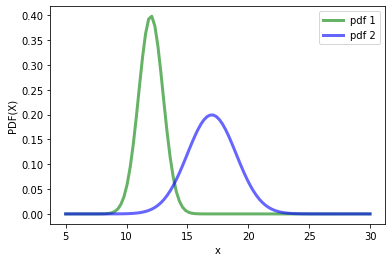

In [93]:
x=np.linspace(5, 30,100)
_, f1, f2 = pdf(x, mean1 = 12, mean2 = 17, desv1 = 1, desv2 = 2)
plt.legend()

¿como se puede encontrar la frontera en este caso?

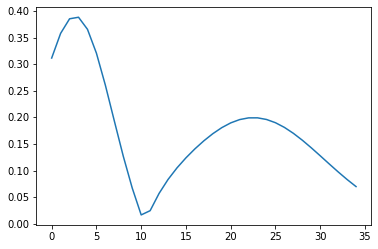

In [94]:
#Determinemos el minimo
plt.plot(abs(f2.pdf(x)-f1.pdf(x))[25:60])

In [95]:
index_min = np.argmin(abs(f2.pdf(x)-f1.pdf(x))[25:60])
f_min = min(abs(f2.pdf(x)-f1.pdf(x))[25:60])
print(f"index min :{index_min}, function min : {f_min}")

index min :10, function min : 0.01644600381255973


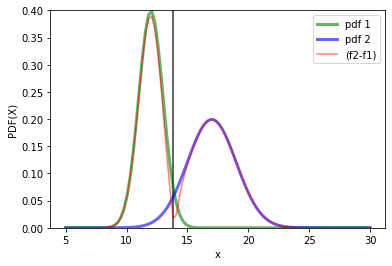

In [96]:
#x = np.linspace(5, 30,1000)
_, f1, f2 = pdf(x, mean1 = 12, mean2 = 17, desv1 = 1, desv2 = 2)
plt.plot(x,abs(f2.pdf(x)-f1.pdf(x)), "r-", alpha=0.5, label="(f2-f1)")
xmin_=x[25+index_min]
plt.vlines(xmin_, 0, 1, alpha=0.8)
plt.ylim(0,0.4)
plt.legend()

La función de distribucion cumulativa, viene dada por:

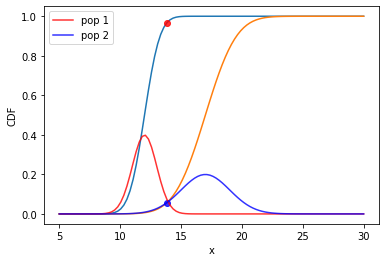

In [97]:
plt.plot(x, f1.cdf(x))
plt.plot(xmin_, f1.cdf(xmin_),"ro", alpha=0.8)

plt.plot(x,f2.cdf(x))
plt.plot(xmin_,f2.cdf(xmin_),"bo", alpha=0.8)

plt.plot(x, f1.pdf(x), color="red", label="pop 1", alpha=0.8)
plt.plot(x, f2.pdf(x), color="blue", label="pop 2",alpha=0.8)
plt.xlim()
plt.ylabel("CDF")
plt.xlabel("x")
plt.legend()
plt.show()

In [98]:
# El error puede ser calculado como :
e1 = 1-f1.cdf(xmin_)
e2 = f2.cdf(xmin_)

#Error asociado a cada distribucion de probabilidad
print(f"{e1*100:.2f} % {e2*100:.1f} % ")

3.30 % 5.7 % 


Analicemos otra situación, aplicando un algoritmo de machine learning:





In [99]:
# Supongamos que tenemos un sistema que puede arrojar valores binario, 
# de esta manera tenemos que dada una variable aleatoria r,el sistema 
# valor determinado. # Volviendo a las distrubicione normales del principio, tenemos que:

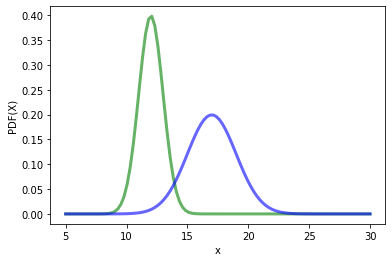

In [100]:
x = np.linspace(5, 30,100)
_, f1, f2 = pdf(x, mean1 = 12, mean2 = 17, desv1 = 1, desv2 = 2)

Elijamos un conjunto de valores 

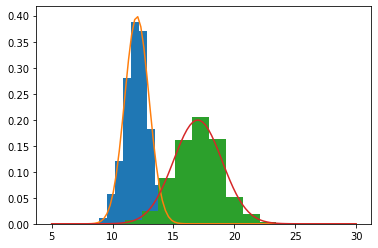

In [101]:
random_1 = f1.rvs(1000) # aqui generamos datos aleatorios a los que no les conocemos la distribución
random_2 = f2.rvs(1000)

plt.figure()
plt.hist(random_1, density=True)
plt.plot(x, f1.pdf(x))
plt.hist(random_2, density=True)
plt.plot(x, f2.pdf(x))
plt.show()

In [102]:
#Generamos N datos para cada distribucion de probabilidad a partir de variables
# aleatorias
m = 100 # training values 

random_1 = f1.rvs(m)  #m variables aleatorias pertenecientes a la clase 1
random_2 = f2.rvs(m)  #m variables aleatorias pertenecientes a la clase 2

X = np.zeros(2*m)
X[0:m] = random_1
X[m:2*m] = random_2  # Construccion de vector con la caracteristica 1

Y = np.zeros(2*m)    # Valor asociada a la caracteristica 1
Y[m:2*m] = np.ones(m) 

El dataset anterior puede ser escrito como:

|Y         | X_1       |
|----------|----------|
|$Y^{1}$ | $X_1^{1}$|
|$Y^{2}$ | $X_1^{2}$|
|.         | .        |
|.         | .        |
|.         | .        |
|$Y^{m}$ | $X_1^{m}$  |




([], <a list of 0 Text major ticklabel objects>)

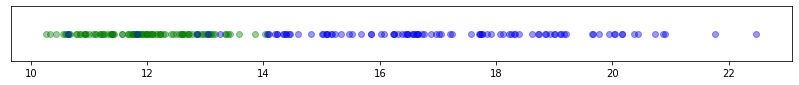

In [103]:
#De forma grafica puede ser entendido asi:
#la forma en la uqe se distribuyen en una dimension

plt.figure(figsize=(14,1))
plt.plot(X[Y==0],np.zeros(m),"go", alpha=0.4)
plt.plot(X[Y==1],np.zeros(m),"bo", alpha=0.4)
plt.yticks([])

¿Como podemos determinar la frontera?
- Empleemos diferentes algoritmos para hacerlo:




In [104]:
from sklearn.tree import DecisionTreeClassifier #libreria de maching learning
X = X.reshape(-1, 1) #exije que sea pasado como un vector de 200x1
clf = DecisionTreeClassifier(max_depth = 1)  # Estimador 
clf = clf.fit(X, Y)                          # Fit 
print(f"Score: {clf.score(X, Y)}")           # Score 
clf.predict(f2.rvs(1).reshape(1, -1))        # prediction

Score: 0.97


array([1.])

In [105]:
# Ya se pueden realizar predicciones.
# Supongamos un nuevo valor perteneciente a al distrubcion 2, asi:
x_test = f2.rvs(5).reshape(1, -1)  # Valor aleatorio para probar y la salida es un  1 o un cero qe me dice a cual pertenece ese numero
# Lo anterior implica que de la clase f2, los valores que se deberian esperar
# son iguales al valor 1, la prediccion que tenemos nos dice que:
clf.predict(x_test.T) # La prediccion 

array([1., 1., 1., 1., 1.])

 Analicemos gráficamente las fronteras:

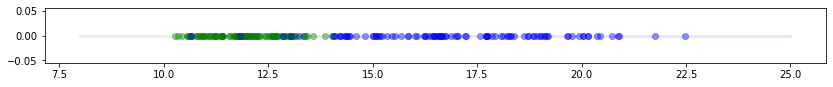

In [106]:
# dado un nuevo conjunto de puntos, ¿que puede estimar el algoritmo?
Xr = np.linspace(8, 25, 100).reshape(-1,1)   # Para un nuevo conjunto de datos, tentemos que  la prediccion es:
yr = clf.predict(Xr) 
plt.figure(figsize=(14,1))
plt.plot(Xr[yr==0], np.zeros(len(Xr[yr==0]) ),color="g" ,alpha=0.1, lw=3 )  # GRaficando la prediccion para el conjunto de datos, para los de tipo 0
plt.plot(Xr[yr==1], np.zeros(len(Xr[yr==1]) ), color="b",alpha=0.1, lw =3 ) #  GRaficando la prediccion para el conjunto de datos, para los de tipo 1
plt.plot(X[Y==0],np.zeros(m),"go", alpha = 0.4) # Valores aleatorios # Valores de entrenamiento
plt.plot(X[Y==1],np.zeros(m),"bo", alpha = 0.4)                      # Valores de test


# Tarea


1. Definir una función que permita determinar m  valores de entrenamiento dado un m, Para  f1, f2  definidos como:

f1 = stats.norm(loc = mean1, scale = desv1)

f2 = stats.norm(loc = mean2, scale = desv2)

Emplee los valores de mean1=12, mean1=17, con desv1=1, desv2=2

Con base en ello,  construya una función de python, que permita determinar la predicción empleando un DesicionTreeClasifier 

```
def train_values(m)
  """
  Params m 
  Return X, y
  """
 
  return X, y
```



```
def main(X, y, Xr, m):    
  """
  Params:
      X : Features values
      y : training values for each features
      Xr : np.linspace(5, 25, 100).reshape(-1, 1) New Values for prediction
      m  : len of value of training 
  Return :
      yr: Prediction
  """


  return yr
```


2. Con la función construida realice los siguientes experimentos:
  - Elija diferentes valores m entre  (10 , 100). ¿Cómo se compara la frontera Bayesiana respecto a los valores determinados?
  - Eliga m=100, realice un muestreo para 10 experimentos, ¿Cómo se compara la frontera Bayesiana respecto a los valores determinados?


In [107]:
 #En resumen
def train_values(m = 100):
  
  random_1 = f1.rvs(m)  #m variables aleatorias pertenecientes a la clase 1
  random_2 = f2.rvs(m)  #m variables aleatorias pertenecientes a la clase 2

  X = np.zeros(2*m)
  X[0:m] = random_1
  X[m:2*m] = random_2  # Construccion de vector con la caracteristica 1

  y = np.zeros(2*m)    # Valor asociada a la caracteristica 1
  y[m:2*m] = np.ones(m) 

  return X, y


def main(X, y, Xr, m):    
  #X, y = train_values(100)
  clf = DecisionTreeClassifier(max_depth = 1)
  clf = clf.fit(X.reshape(-1, 1), y)

 # Xr = np.linspace(8,25, 100 ).reshape(-1, 1)
  yr = clf.predict(Xr)


  plt.figure(figsize=(14,1))
  plt.plot(Xr[yr==0], np.zeros(len(Xr[yr==0]) ), color="g", alpha=0.6, lw=3 )  # GRaficando la prediccion para el conjunto de datos, para los de tipo 0
  plt.plot(Xr[yr==1], np.zeros(len(Xr[yr==1]) ), color="b", alpha=0.6, lw =3 ) #  GRaficando la prediccion para el conjunto de datos, para los de tipo 1
  plt.plot(X[y==0],np.zeros(m),"g.", alpha = 0.4) # Valores aleatorios # Valores de entrenamiento
  plt.plot(X[y==1],np.zeros(m),"b.", alpha = 0.4)                      # Valores de test
  plt.yticks([])
  plt.show()

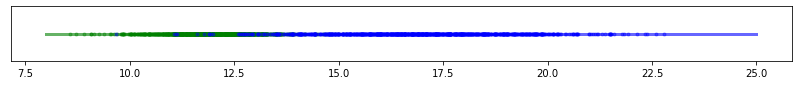

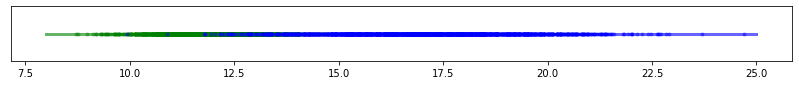

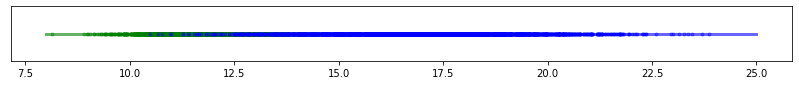

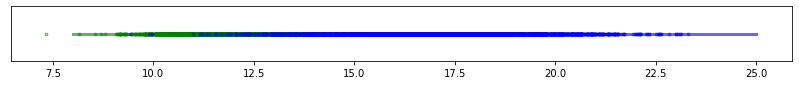

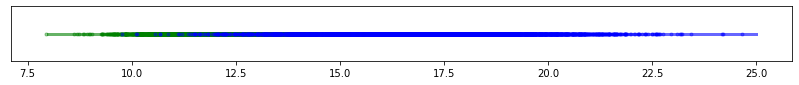

In [108]:
# Para diferentes valores de entrenamiento, el resultado es el siguiente:
m = 100*np.arange(10, 60, 10)

for m_ in m:
  X, y = train_values(m_)
  Xr = np.linspace(8,25, 100 ).reshape(-1, 1)
  main(X, y, Xr,m_)
  
  #esto muestra como esta variando esta frontera respecto a la frontera bayesiana

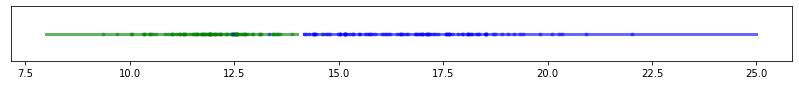

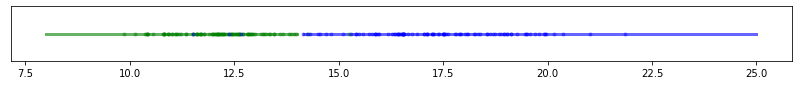

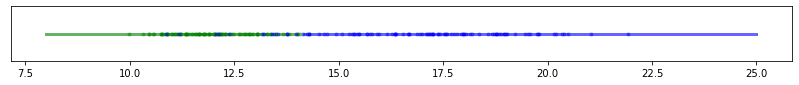

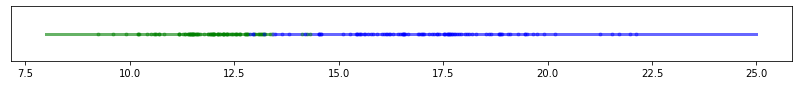

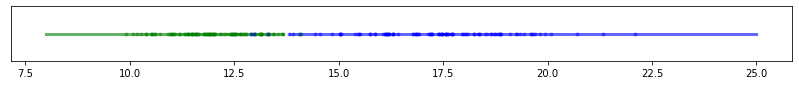

In [109]:
# Realicemos un muestreo para  m valores 10 experimentos
m = 100*np.ones(5)
for m_ in m:
  m_=int(m_)
  X, y = train_values(m_)
  Xr = np.linspace(8,25, 100 ).reshape(-1, 1)
  main(X, y, Xr,m_)


Definamos distribuciones con nuevos parámetros para observar el comportamiento del algoritmo y la ubicación de las fronteras

Medias bien diferenciadas


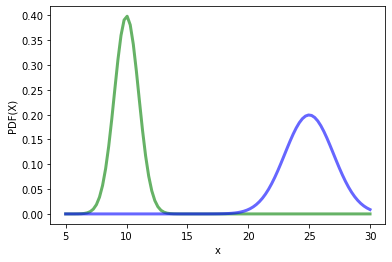

In [144]:
print("Medias bien diferenciadas")
x = np.linspace(5, 30,100)
_, f1, f2 = pdf(x, mean1 = 10, mean2 = 25, desv1 = 1, desv2 = 2)

def train_values(m = 100):
  
  random_1 = f1.rvs(m)  #m variables aleatorias pertenecientes a la clase 1
  random_2 = f2.rvs(m)  #m variables aleatorias pertenecientes a la clase 2

  X = np.zeros(2*m)
  X[0:m] = random_1
  X[m:2*m] = random_2  # Construccion de vector con la caracteristica 1

  y = np.zeros(2*m)    # Valor asociada a la caracteristica 1
  y[m:2*m] = np.ones(m) 

  return X, y


def main(X, y, Xr, m):    
  #X, y = train_values(100)
  clf = DecisionTreeClassifier(max_depth = 1)
  clf = clf.fit(X.reshape(-1, 1), y)

 # Xr = np.linspace(8,25, 100 ).reshape(-1, 1)
  yr = clf.predict(Xr)


  plt.figure(figsize=(14,1))
  plt.plot(Xr[yr==0], np.zeros(len(Xr[yr==0]) ), color="g", alpha=0.6, lw=3 )  # GRaficando la prediccion para el conjunto de datos, para los de tipo 0
  plt.plot(Xr[yr==1], np.zeros(len(Xr[yr==1]) ), color="b", alpha=0.6, lw =3 ) #  GRaficando la prediccion para el conjunto de datos, para los de tipo 1
  plt.plot(X[y==0],np.zeros(m),"g.", alpha = 0.4) # Valores aleatorios # Valores de entrenamiento
  plt.plot(X[y==1],np.zeros(m),"b.", alpha = 0.4)                      # Valores de test
  plt.yticks([])
  plt.show()

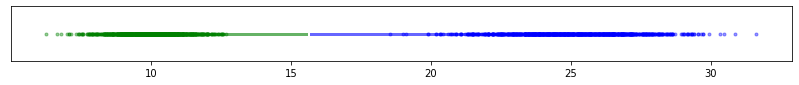

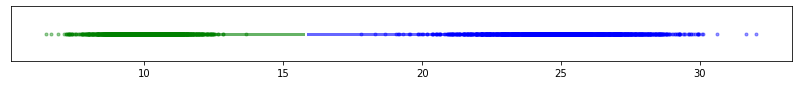

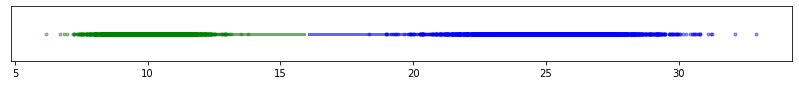

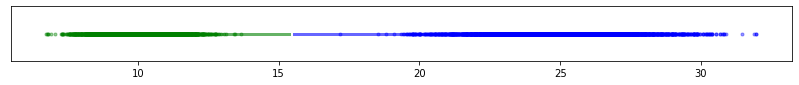

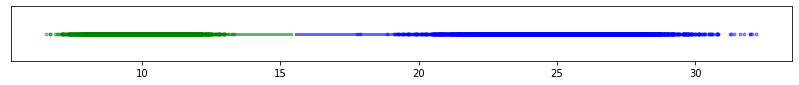

In [138]:
# Para diferentes valores de entrenamiento, el resultado es el siguiente:
m = 100*np.arange(10, 60, 10)

for m_ in m:
  X, y = train_values(m_)
  Xr = np.linspace(8,25, 100 ).reshape(-1, 1)
  main(X, y, Xr,m_)

De manera gráfica podemos observar que en este ejemplo los datos se distinguen bien en su grupo

In [140]:
m = 100 # training values 

random_1 = f1.rvs(m)  #m variables aleatorias pertenecientes a la clase 1
random_2 = f2.rvs(m)  #m variables aleatorias pertenecientes a la clase 2

X = np.zeros(2*m)
X[0:m] = random_1
X[m:2*m] = random_2  # Construccion de vector con la caracteristica 1

Y = np.zeros(2*m)    # Valor asociada a la caracteristica 1
Y[m:2*m] = np.ones(m)

from sklearn.tree import DecisionTreeClassifier #libreria de maching learning
X = X.reshape(-1, 1) #exije que sea pasado como un vector de 200x1
clf = DecisionTreeClassifier(max_depth = 1)  # Estimador 
clf = clf.fit(X, Y)                          # Fit 
print(f"Score: {clf.score(X, Y)}")           # Score 
clf.predict(f2.rvs(1).reshape(1, -1))        # predictio

Score: 1.0


array([1.])

Podemos observar que como las distribuciones están bien diferenciadas, la discriminación de los datos es del 100%

Medias muy cercanas


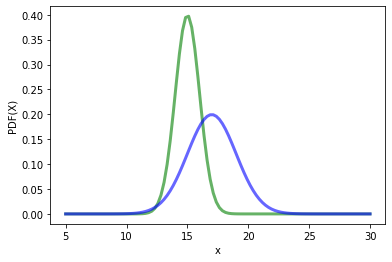

In [145]:
print("Medias muy cercanas")
x = np.linspace(5, 30,100)
_, f1, f2 = pdf(x, mean1 = 15, mean2 = 17, desv1 = 1, desv2 = 2)

def train_values(m = 100):
  
  random_1 = f1.rvs(m)  #m variables aleatorias pertenecientes a la clase 1
  random_2 = f2.rvs(m)  #m variables aleatorias pertenecientes a la clase 2

  X = np.zeros(2*m)
  X[0:m] = random_1
  X[m:2*m] = random_2  # Construccion de vector con la caracteristica 1

  y = np.zeros(2*m)    # Valor asociada a la caracteristica 1
  y[m:2*m] = np.ones(m) 

  return X, y


def main(X, y, Xr, m):    
  #X, y = train_values(100)
  clf = DecisionTreeClassifier(max_depth = 1)
  clf = clf.fit(X.reshape(-1, 1), y)

 # Xr = np.linspace(8,25, 100 ).reshape(-1, 1)
  yr = clf.predict(Xr)


  plt.figure(figsize=(14,1))
  plt.plot(Xr[yr==0], np.zeros(len(Xr[yr==0]) ), color="g", alpha=0.6, lw=3 )  # GRaficando la prediccion para el conjunto de datos, para los de tipo 0
  plt.plot(Xr[yr==1], np.zeros(len(Xr[yr==1]) ), color="b", alpha=0.6, lw =3 ) #  GRaficando la prediccion para el conjunto de datos, para los de tipo 1
  plt.plot(X[y==0],np.zeros(m),"g.", alpha = 0.4) # Valores aleatorios # Valores de entrenamiento
  plt.plot(X[y==1],np.zeros(m),"b.", alpha = 0.4)                      # Valores de test
  plt.yticks([])
  plt.show()

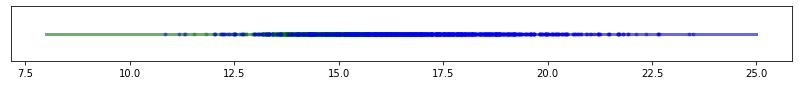

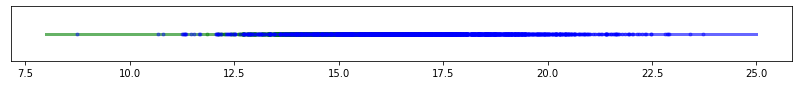

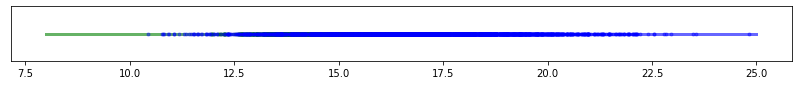

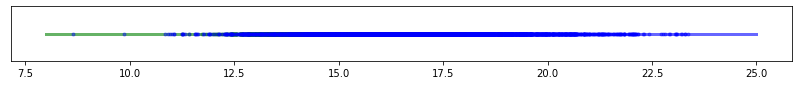

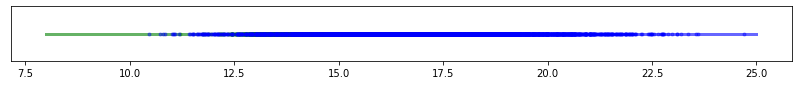

In [146]:
m = 100*np.arange(10, 60, 10)

for m_ in m:
  X, y = train_values(m_)
  Xr = np.linspace(8,25, 100 ).reshape(-1, 1)
  main(X, y, Xr,m_)

Observamos cómo es difícil diferenciar una frontera entre los grupos de datos

In [147]:
m = 100 # training values 

random_1 = f1.rvs(m)  #m variables aleatorias pertenecientes a la clase 1
random_2 = f2.rvs(m)  #m variables aleatorias pertenecientes a la clase 2

X = np.zeros(2*m)
X[0:m] = random_1
X[m:2*m] = random_2  # Construccion de vector con la caracteristica 1

Y = np.zeros(2*m)    # Valor asociada a la caracteristica 1
Y[m:2*m] = np.ones(m)

from sklearn.tree import DecisionTreeClassifier #libreria de maching learning
X = X.reshape(-1, 1) #exije que sea pasado como un vector de 200x1
clf = DecisionTreeClassifier(max_depth = 1)  # Estimador 
clf = clf.fit(X, Y)                          # Fit 
print(f"Score: {clf.score(X, Y)}")           # Score 
clf.predict(f2.rvs(1).reshape(1, -1))        # predicti

Score: 0.765


array([1.])

Del score del algoritmo de clasificación confirmamos que entre más cercanas las medias de la distribución, más difícil es para el algoritmo predecir en cuál grupo caería un nuevo dato generado

# 2 Dimensiones

Caso Bivariante

\begin{equation}
f(x, y) = \frac{1}{2\pi \sigma_x \sigma_y \sqrt{1-\rho^2}} \exp \left( -\frac{1}{2(1-\rho^2)} \left(\frac{x^2}{\sigma_x^2}+\frac{y^2}{\sigma_y^2}-\frac{2\rho x y}{(\sigma_x \sigma_y)} \right) \right) 
\end{equation}


$\rho$ coeficiente de correlación, media es $(0, 0)$


La matriz de covarianzas viene dada por:

\begin{equation}
\Sigma =  
\begin{bmatrix}
\sigma_x^2 & \rho \sigma_x \sigma_y  \\
\rho \sigma_x \sigma_y & \sigma_y^2\\
\end{bmatrix}
\end{equation}

Otra forma de escribirla puede ser como sigue



### El caso más general viene dado por:

En el caso más general tenemos que :
\begin{equation}
f_X(x_1,x_2, ... x_n) = \frac{1}{2\pi^{n/2}|\Sigma|^{1/2}} \exp\left( -\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)\right)
\end{equation}


$|\Sigma|$ es el determinante de la matrix de covarianza, 






In [111]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
from sklearn.model_selection import train_test_split


## Funcion de distribucion de  probabilidad  1D

Text(0, 0.5, 'PDF(X)')

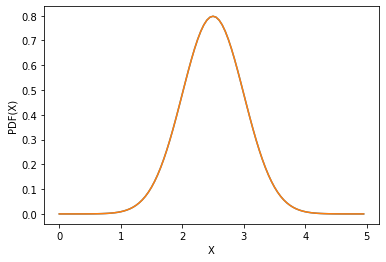

In [112]:
x = np.linspace(0, 5, 100, endpoint=False)
y = multivariate_normal.pdf(x, mean = 2.5, cov = 0.25);  

f1 = stats.norm(loc = 2.5, scale = np.sqrt((0.25))) 

fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.plot(x, y)
ax.plot(x,f1.pdf(x))
ax.set_xlabel("X")
ax.set_ylabel("PDF(X)")


## Funcion de distribucion de  probabilidad  2D

In [113]:
x, y = np.mgrid[-4:4:.1, -4:4:.1]
pos = np.dstack((x, y))
mu = [0.0, 0.0]                 # Centrada en el origen 
cov = [[1.0, 0.0], [0.0, 1.0]]  # Matriz de covarianzas identidad
rv = multivariate_normal(mu, cov)

x1, y1 = np.mgrid[-4:4:.1, -4:4:.1]
pos1 = np.dstack((x1, y1))
mu1 = [0.0, 0.0]                 # Centrada en el origen 
cov1 = [[1.0, -0.5], [-0.5, 1.0]]  # Matriz de covarianzas identidad
rv1 = multivariate_normal(mu1, cov1)

x2, y2 = np.mgrid[-4:4:.1, -4:4:.1]
pos2 = np.dstack((x2, y2))
mu2 = [0.0, 0.0]                 # Centrada en el origen 
cov2 = [[1.0, 0.8], [0.8, 1]]  # Matriz de covarianzas identidad
rv2 = multivariate_normal(mu2, cov2)



Text(0, 0.5, '$PDF(X_1, X_2)$')

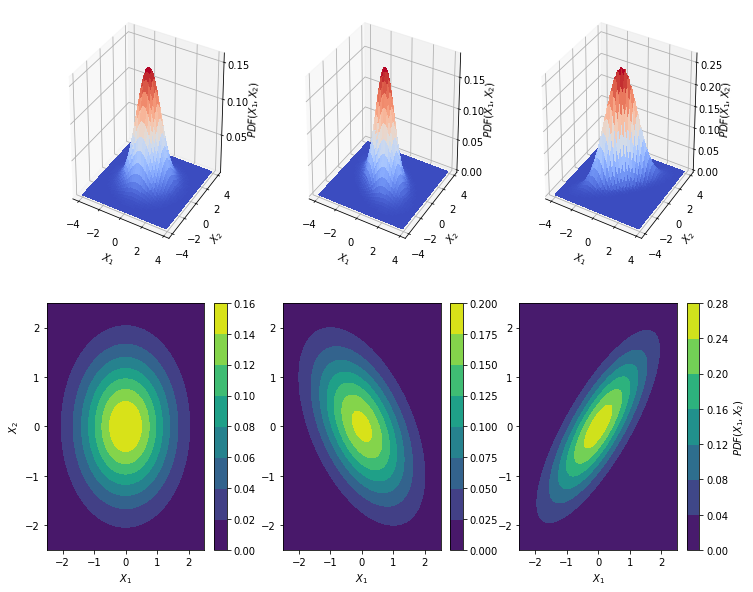

In [114]:
# Set up a figure twice as tall as it is wide
fig = plt.figure(figsize = (12,10))

ax = fig.add_subplot(2, 3, 1, projection='3d')
#fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x,y, rv.pdf(pos), cmap = cm.coolwarm,
                       linewidth = 0, antialiased = False)
ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$")
ax.set_zlabel("$PDF(X_1,X_2)$")

ax = fig.add_subplot(2, 3, 2, projection='3d')
#fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x1,y1, rv1.pdf(pos1), cmap = cm.coolwarm,
                       linewidth = 0, antialiased = False)
ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$")
ax.set_zlabel("$PDF(X_1,X_2)$")


ax = fig.add_subplot(2, 3, 3, projection='3d')
#fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x2,y2, rv2.pdf(pos2), cmap = cm.coolwarm,
                       linewidth = 0, antialiased = False)
ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$")
ax.set_zlabel("$PDF(X_1,X_2)$")

#=============================================================
ax = fig.add_subplot(2, 3, 4)
cs = ax.contourf(x, y, rv.pdf(pos))
ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$")
ax.set_xlim(-2.5,2.5)
ax.set_ylim(-2.5,2.5)
cbar = fig.colorbar(cs)
#cbar.ax.set_ylabel('PDF(X_1, X_2)$')

ax = fig.add_subplot(2, 3, 5)
cs = ax.contourf(x1, y1, rv1.pdf(pos1))
ax.set_xlabel("$X_1$")
#ax.set_ylabel("$X_2$")
ax.set_xlim(-2.5,2.5)
ax.set_ylim(-2.5,2.5)
cbar = fig.colorbar(cs)
#cbar.ax.set_ylabel('PDF(X_1, X_2)$')

ax = fig.add_subplot(2, 3, 6)
cs = ax.contourf(x2, y2, rv2.pdf(pos2))
ax.set_xlabel("$X_1$")
#ax.set_ylabel("$X_2$")
ax.set_xlim(-2.5,2.5)
ax.set_ylim(-2.5,2.5)
cbar = fig.colorbar(cs)
cbar.ax.set_ylabel('$PDF(X_1, X_2)$')
#=============================================================


# Add the contour line levels to the colorbar


\begin{equation}
\mu =  
\begin{bmatrix}
0 \\
0 \\
\end{bmatrix}
\end{equation}

\begin{equation}
\Sigma =  
\begin{bmatrix}
1 & 0  \\
0 & 1\\
\end{bmatrix}
\end{equation}


\begin{equation}
\Sigma =  
\begin{bmatrix}
1 & 0.5  \\
0.5 & 1\\
\end{bmatrix}
\end{equation}


\begin{equation}
\Sigma =  
\begin{bmatrix}
1 & 0.8  \\
0.8 & 1\\
\end{bmatrix}
\end{equation}


Tomemos dos funcion de distribucion de probabilidad y realicemos un procedimiento analogo al descrito en 1D, en este caso, nos podemos preguntar
por ¿cual es el plano que permite separar dos distrubuciones?, es importante resaltar que cuando se esta trabajando con datos, generalmente no se conoce la distribucion de probablidad de los datos, solo hay un pequeña muestra  para la cual se desea minimar el error respecto a la frontera Bayesiana. 

Supongamos dos distrubuciones de datos,respresentados de la siguiente forma:

In [115]:
# Caso mas visible
x, y = np.mgrid[-4:4:.1, -4:4:.1]
pos = np.dstack((x, y))
mu = [1, 1]                 # Centrada en el origen 
cov = [[1.0, 0.0], [0.0, 1.0]]  # Matriz de covarianzas identidad
rv = multivariate_normal(mu, cov)

x1, y1 = np.mgrid[-4:4:.1, -4:4:.1]
pos1 = np.dstack((x1, y1))
mu1 = [-2, -2]                 # Centrada en el origen 
cov1 = [[1.0, -0.5], [-0.5, 1.0]]  # Matriz de covarianzas identidad
rv1 = multivariate_normal(mu1, cov1)

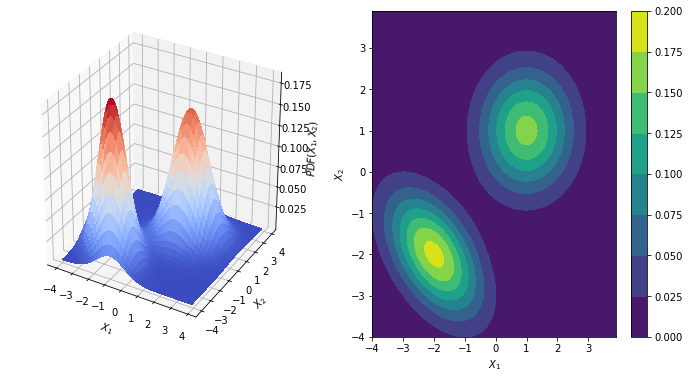

In [116]:
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
surf1 = ax.plot_surface(x,y, rv.pdf(pos) + rv1.pdf(pos1), cmap = cm.coolwarm,
                       linewidth = 0, antialiased = False)
ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$")
ax.set_zlabel("$PDF(X_1,X_2)$")
#=============================================================
ax = fig.add_subplot(1, 2, 2)
cs1 = ax.contourf(x, y, rv.pdf(pos) + rv1.pdf(pos1)  )
#cs2 = ax.contourf(x1, y1, rv1.pdf(pos1) )
ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$")
#ax.set_xlim(-2.5,2.5)
#ax.set_ylim(-2.5,2.5)
cbar = fig.colorbar(cs1)



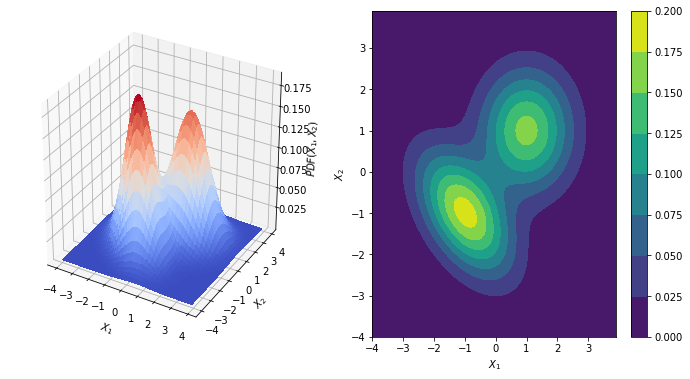

In [117]:
# Caso 
#=======================================================
x, y = np.mgrid[-4:4:.1, -4:4:.1]
pos = np.dstack((x, y))
mu = [1, 1]                 # Centrada en el origen 
cov = [[1.0, 0.0], [0.0, 1.0]]  # Matriz de covarianzas identidad
rv = multivariate_normal(mu, cov)

x1, y1 = np.mgrid[-4:4:.1, -4:4:.1]
pos1 = np.dstack((x1, y1))
mu1 = [-1, -1]                 # Centrada en el origen 
cov1 = [[1.0, -0.5], [-0.5, 1.0]]  # Matriz de covarianzas identidad
rv1 = multivariate_normal(mu1, cov1)
#=======================================================

fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
surf1 = ax.plot_surface(x,y, rv.pdf(pos) + rv1.pdf(pos1), cmap = cm.coolwarm,
                       linewidth = 0, antialiased = False)
ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$")
ax.set_zlabel("$PDF(X_1,X_2)$")
#=============================================================
ax = fig.add_subplot(1, 2, 2)
cs1 = ax.contourf(x, y, rv.pdf(pos) + rv1.pdf(pos1)  )
#cs2 = ax.contourf(x1, y1, rv1.pdf(pos1) )
ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$")
#ax.set_xlim(-2.5,2.5)
#ax.set_ylim(-2.5,2.5)
cbar = fig.colorbar(cs1)



Supongamos, que podemos tener una muestra del  dataset(análogo a uando tiene un  problema NO ideal).

El dataset anterior puede ser escrito como:

|Y         | X_1       |X_2       |
|----------|----------|-----------|
|$Y^{1}$ | $X_1^{1}$|  $X_2^{1}$| 
|$Y^{2}$ | $X_1^{2}$|$X_2^{1}$| 
|.         | .        |.        |
|.         | .        |.        |
|.         | .        |.        |
|$Y^{m}$ | $X_1^{m}$  |$X_2^{1}$| 


y, desde python puede ser generado como sigue:


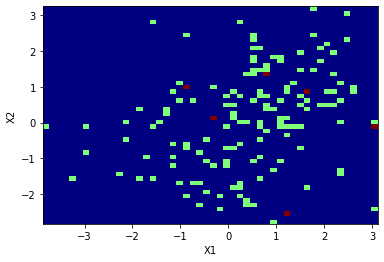

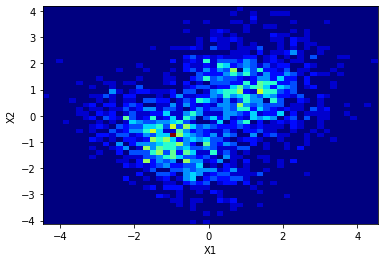

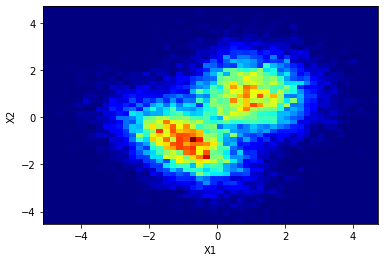

In [118]:
# Histograma de los datos sinteticos a estudiar
N = 1000
def fig_2histogram(N1,N2):
  X_data1 = np.concatenate([rv.rvs(N1), rv1.rvs(N2)]) # Todos los datos en la misma distribución, 
  #pertenecientes a dos clases
  plt.figure()
  plt.hist2d(X_data1[:,0], X_data1[:,1], bins=(50, 50), cmap=plt.cm.jet)
  #plt.figure()
  #plt.hist2d(X_data2[:,0], X_data2[:,1], bins=(50, 50), cmap=plt.cm.jet)
  plt.xlabel("X1")
  plt.ylabel("X2")
  plt.show()

fig_2histogram(N1 = 100,  N2 = 50)
fig_2histogram(N1 = 1000, N2 = 1000)
fig_2histogram(N1 = 10000,N2 = 10000)


In [119]:
def sample(N1= 1000, N2 = 100):
  X_t = np.concatenate([rv.rvs(N1), rv1.rvs(N2)]) # Todos los datos en la misma distribución, 
  y   = np.concatenate([np.zeros(N1), np.ones(N2) ]  )
  return X_t, y

Text(0, 0.5, 'X2')

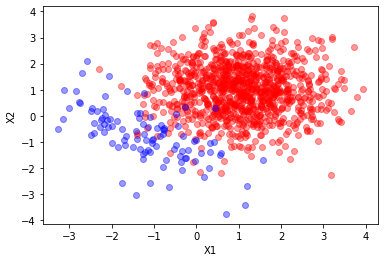

In [120]:
X_t, y = sample()
plt.plot(X_t[y==0][:,0],X_t[y==0][:,1],"ro", alpha=0.4)
plt.plot(X_t[y==1][:,0],X_t[y==1][:,1],"bo", alpha=0.4)
plt.xlabel("X1")
plt.ylabel("X2")

# Tarea
Dadas que las  distribuciones de probabilidad son conocidas, ¿Cómo se puede aproximar la frontera Bayesiana en este caso?. Implemente un algoritmo que permita determinarla

## Boundary 
Librerias para dibujar la frontera:

https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html


In [121]:
def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_contoursExact(ax, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Generation of Data

In [122]:
#Un poco mas ordena, la generacion de data
def data( mu=[1,1], mu1=[-2,2], cov=[[1.0, 0.0], [0.0, 1.0]] , cov1= [[1.0, -0.5], [-0.5, 1.0]]   ):# Caso mas visible  
  rv = multivariate_normal(mu, cov)
  rv1 = multivariate_normal(mu1, cov1)
  return rv, rv1

def sample(N1= 1000, N2 = 100):
  X_t = np.concatenate([rv.rvs(N1), rv1.rvs(N2)]) # Todos los datos en la misma distribución, 
  y   = np.concatenate([np.zeros(N1), np.ones(N2) ]  )
  return X_t, y


Text(0, 0.5, 'X2')

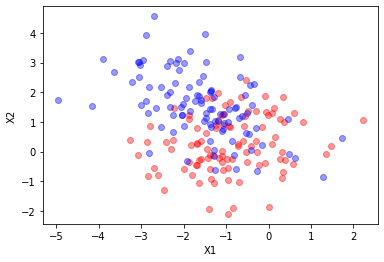

In [123]:
rv, rv1 = data(mu=[-1.2, 0.2], mu1=[-1.5, 1.5],
               cov=[[1.0, 0.0], [0.0, 1.0]] , 
               cov1= [[1.0, -0.5], [-0.5, 1.0]] )

X_t, y = sample(N1 = 100, N2 = 100)
X_p, y_ = sample(N1 = 100, N2 = 100)

plt.plot(X_t[y==0][:,0],X_t[y==0][:,1],"ro", alpha=0.4)
plt.plot(X_t[y==1][:,0],X_t[y==1][:,1],"bo", alpha=0.4)
plt.xlabel("X1")
plt.ylabel("X2")



In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

# SVC

In [125]:
X_t, y = X_train, y_train # Datos de entrenamiento 
X_p, y_ = X_test, y_test  # Datos para la prediccion 


0.7761194029850746


Text(0.5, 1.0, 'Valores Esperados')

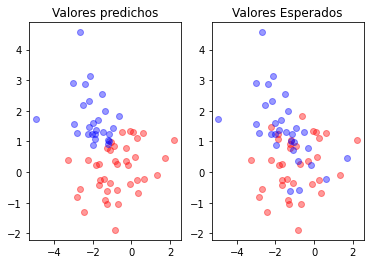

In [126]:
from sklearn.svm import SVC
clf = SVC( gamma = 0.2) 
clf.fit(X_t,y)
print(clf.score(X_t, y))
y_p = clf.predict(X_p)


plt.subplot(121)
plt.plot(X_p[y_p==0][:,0],X_p[y_p==0][:,1],"ro", alpha=0.4)
plt.plot(X_p[y_p==1][:,0],X_p[y_p==1][:,1],"bo", alpha=0.4)
plt.title("Valores predichos")

plt.subplot(122)
plt.plot(X_p[y_==0][:,0],X_p[y_==0][:,1],"ro", alpha=0.4)
plt.plot(X_p[y_==1][:,0],X_p[y_==1][:,1],"bo", alpha=0.4)
plt.title("Valores Esperados")


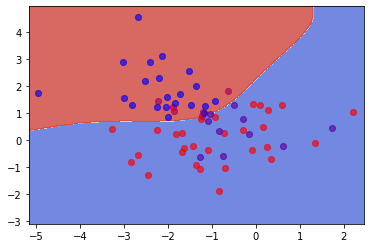

In [127]:
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X_t[:, 0], X_t[:, 1]
xx, yy = make_meshgrid(X0, X1)

plt.plot(X_p[y_p==0][:,0],X_p[y_p==0][:,1],"ro", alpha=0.4)
plt.plot(X_p[y_p==1][:,0],X_p[y_p==1][:,1],"bo", alpha=0.4)

plt.plot(X_p[y_==0][:,0],X_p[y_==0][:,1],"ro", alpha=0.4)
plt.plot(X_p[y_==1][:,0],X_p[y_==1][:,1],"bo", alpha=0.4)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)


Empleando pipelines

```
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
X_t, y = sample()
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_t, y)
```


## LogisticRegresion

0.7686567164179104


Text(0.5, 1.0, 'Valores Esperados')

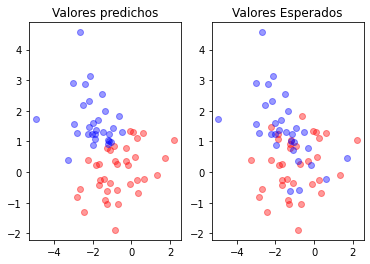

In [128]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression( ) 
clf.fit(X_t,y)
print(clf.score(X_t,y))
y_p = clf.predict(X_p)


plt.subplot(121)
plt.plot(X_p[y_p==0][:,0],X_p[y_p==0][:,1],"ro", alpha=0.4)
plt.plot(X_p[y_p==1][:,0],X_p[y_p==1][:,1],"bo", alpha=0.4)
plt.title("Valores predichos")

plt.subplot(122)
plt.plot(X_p[y_==0][:,0],X_p[y_==0][:,1],"ro", alpha=0.4)
plt.plot(X_p[y_==1][:,0],X_p[y_==1][:,1],"bo", alpha=0.4)
plt.title("Valores Esperados")


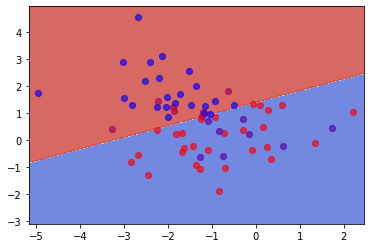

In [129]:
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X_t[:, 0], X_t[:, 1]
xx, yy = make_meshgrid(X0, X1)

plt.plot(X_p[y_p==0][:,0],X_p[y_p==0][:,1],"ro", alpha=0.4)
plt.plot(X_p[y_p==1][:,0],X_p[y_p==1][:,1],"bo", alpha=0.4)

plt.plot(X_p[y_==0][:,0],X_p[y_==0][:,1],"ro", alpha=0.4)
plt.plot(X_p[y_==1][:,0],X_p[y_==1][:,1],"bo", alpha=0.4)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)


## RandomForestClassifier

1.0


Text(0.5, 1.0, 'Valores Esperados')

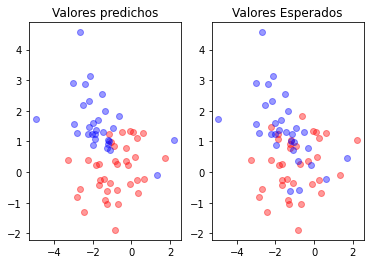

In [130]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier() 
clf.fit(X_t,y)
print(clf.score(X_t,y))
y_p = clf.predict(X_p)

plt.subplot(121)
plt.plot(X_p[y_p==0][:,0],X_p[y_p==0][:,1],"ro", alpha=0.4)
plt.plot(X_p[y_p==1][:,0],X_p[y_p==1][:,1],"bo", alpha=0.4)
plt.title("Valores predichos")

plt.subplot(122)
plt.plot(X_p[y_==0][:,0],X_p[y_==0][:,1],"ro", alpha=0.4)
plt.plot(X_p[y_==1][:,0],X_p[y_==1][:,1],"bo", alpha=0.4)
plt.title("Valores Esperados")


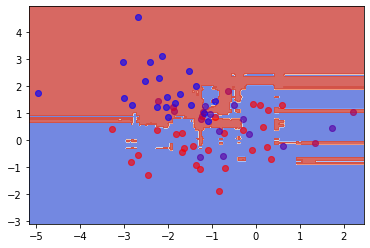

In [131]:
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X_t[:, 0], X_t[:, 1]
xx, yy = make_meshgrid(X0, X1)

plt.plot(X_p[y_p==0][:,0],X_p[y_p==0][:,1],"ro", alpha=0.4)
plt.plot(X_p[y_p==1][:,0],X_p[y_p==1][:,1],"bo", alpha=0.4)

plt.plot(X_p[y_==0][:,0],X_p[y_==0][:,1],"ro", alpha=0.4)
plt.plot(X_p[y_==1][:,0],X_p[y_==1][:,1],"bo", alpha=0.4)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)


# Apendice

 Empleando un flujo de trabajo existente de trabajo en  [sklearn](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html) para los datos de estudio, tenemos que:

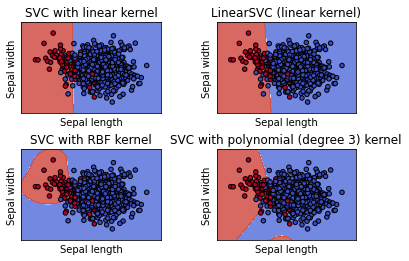

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets



# Take the first two features. We could avoid this by using a two-dim dataset
rv, rv1 = data(mu=[1,1], mu1=[-1.5,1.5],
               cov=[[1.0, 0.0], [0.0, 1.0]] , 
               cov1= [[1.0, -0.5], [-0.5, 1.0]] )

X_t, y = sample()


X_train, X_test, y_train, y_test = train_test_split(X_t, y, 
                                                    test_size=0.33, 
                                                    random_state=42)


X = X_train
y = y_train
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel("Sepal length")
    ax.set_ylabel("Sepal width")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()